In [2]:
import mapreduce as mr
import numpy as np

In [1]:
import pysal as ps
import pandas as pd
import geopandas as gpd

In [445]:
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt
import json
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
plt.style.use('ggplot')

In [228]:
with open('total_dp.txt') as fi:
    reader = fi.readlines()

In [ ]:
len(reader)

In [229]:
reader[1:10]

['5,15,77,75,44\n',
 '0,11,46,129,1\n',
 '3,5,259,177,1\n',
 '4,15,234,157,13\n',
 '0,10,231,15,1\n',
 '6,18,154,258,48\n',
 '2,15,171,244,41\n',
 '3,11,16,134,5\n',
 '0,21,170,259,1\n']

In [230]:
len(reader)

11104650

In [231]:
def mapper(row):
    lines = row.strip().split(',')
    if lines[2] != lines[3]:
        yield((lines[2],lines[3]),int(lines[4]))

def reducer(k2v2):
    word, counts= k2v2
    return (word, sum(counts))

with open('total_dp.txt') as fi:
    reader = fi.readlines()
    output3 = list(mr.run(reader, mapper, reducer))
    

ValueError: invalid literal for int() with base 10: 'count'

In [81]:
len(output3)

41487

In [72]:
def mapper1(row):
    if int(row[0][0]) < int(row[0][1]):
        yield ((row[0][0],row[0][1]),row[1])
    else:
        yield ((row[0][1],row[0][0]),row[1])
    

def reducer1(k2v2):
    word, counts= k2v2
    return (word,sum(counts))

output4 = list(mr.run(output3, mapper1, reducer1))

In [67]:
len(output4)

24037

In [75]:
output4[1:100]

[(('0', '108'), 1),
 (('0', '12'), 1),
 (('0', '120'), 1),
 (('0', '125'), 2),
 (('0', '129'), 1),
 (('0', '13'), 1),
 (('0', '130'), 1),
 (('0', '132'), 2),
 (('0', '134'), 1),
 (('0', '136'), 1),
 (('0', '138'), 1),
 (('0', '139'), 1),
 (('0', '141'), 1),
 (('0', '145'), 3),
 (('0', '146'), 2),
 (('0', '148'), 1),
 (('0', '15'), 1),
 (('0', '150'), 1),
 (('0', '156'), 1),
 (('0', '159'), 1),
 (('0', '16'), 2),
 (('0', '174'), 1),
 (('0', '180'), 1),
 (('0', '185'), 1),
 (('0', '187'), 4),
 (('0', '189'), 1),
 (('0', '190'), 1),
 (('0', '198'), 1),
 (('0', '200'), 1),
 (('0', '202'), 3),
 (('0', '203'), 2),
 (('0', '21'), 2),
 (('0', '211'), 3),
 (('0', '215'), 1),
 (('0', '225'), 1),
 (('0', '229'), 3),
 (('0', '230'), 1),
 (('0', '236'), 1),
 (('0', '239'), 1),
 (('0', '240'), 1),
 (('0', '244'), 1),
 (('0', '245'), 1),
 (('0', '246'), 1),
 (('0', '248'), 3),
 (('0', '254'), 2),
 (('0', '31'), 2),
 (('0', '41'), 1),
 (('0', '46'), 1),
 (('0', '5'), 1),
 (('0', '51'), 1),
 (('0', '58

In [ ]:
def mapper(row):
    lines = row.strip().split(',')
    if lines[2] != lines[3]:
        yield((lines[2],lines[3]),1)

def reducer(k2v2):
    word, counts= k2v2
    return (word, sum(counts))

with open('total_dp.txt') as fi:
    reader = fi.readlines()
    output5 = list(mr.run(reader, mapper, reducer))

In [78]:
file = open('link.txt','wb')
for item in output4:
     print >> file, int(item[0][0]),int(item[0][1]),item[1]

In [441]:
data = gpd.read_file('taxi1.geojson')

In [442]:
data[data['cartodb_id'] ==202]

,cartodb_id,geometry,ntaname
229,202,"(POLYGON ((-73.9418 40.769047, -73.94256799999...",Roosevelt Island


In [443]:
psGeom = ps.open('table_29.shp', 'r')

In [444]:
W = ps.buildContiguity(psGeom, criterion='queen', ids=data.index.values.tolist())

Island ids:  [19, 39, 98, 229, 260, 261]


In [445]:
wlist = []
for item in W:
    wlist.append([item[0],item[1].keys()])

In [446]:
len(wlist)

263

In [447]:
pk = []
dp = []
for i in range(len(wlist)):
#     print wlist[i][0]
    if len(wlist[i][1]) == 0 :
        pass
    else: 
        for j in range(len(wlist[i][1])):
            dp.append(int(wlist[i][0]))
            pk.append(int(wlist[i][1][j]))

In [448]:
len(dp)

1302

In [449]:
dataA = pd.DataFrame({'dp':dp,'pk':pk,'w':1})

In [450]:
dataA.head()

,dp,pk,w
0,0,65,1
1,0,123,1
2,1,105,1
3,1,12,1
4,2,202,1


In [451]:
extra_dp = []
extra_pk = []
with open('extra111.txt') as fi:
    ex_reader = fi.readlines()
    for item in ex_reader:
        extra_dp.append(int(item.strip().split(',')[0]))
        extra_pk.append(int(item.strip().split(',')[1]))
        extra_dp.append(int(item.strip().split(',')[1]))
        extra_pk.append(int(item.strip().split(',')[0]))
dataB = pd.DataFrame({'dp':extra_dp,'pk':extra_pk,'w':1})

In [452]:
dataA = pd.concat([dataA,dataB])

In [453]:
id_list = []
x_list = []
y_list = []
for i in range(len(data)):
    id_list.append(data.index[i])
    x_list.append(data.geometry.centroid[i].x)
    y_list.append(data.geometry.centroid[i].y)

In [454]:
dataA.to_csv('dataA.csv',index=False)

In [455]:
XY = pd.DataFrame({'id':id_list,'X':x_list,'Y':y_list})

In [456]:
XY.head()

,X,Y,id
0,-73.831298,40.616745,0
1,-73.923086,40.778559,1
2,-73.785972,40.783333,2
3,-74.170887,40.606448,3
4,-73.906908,40.559133,4


In [457]:
XY.to_csv('XY.csv',index=False)

In [458]:
G=nx.from_pandas_dataframe(dataA, u'dp', u'pk', u'w',create_using=nx.DiGraph())

In [459]:
pos = nx.spring_layout(G)

In [460]:
pos = nx.spring_layout(G)
for i in pos:
    for j in XY['id'].index:
        if XY['id'][j]==i:
            pos[i] = array([XY['Y'][j],-XY['X'][j]])

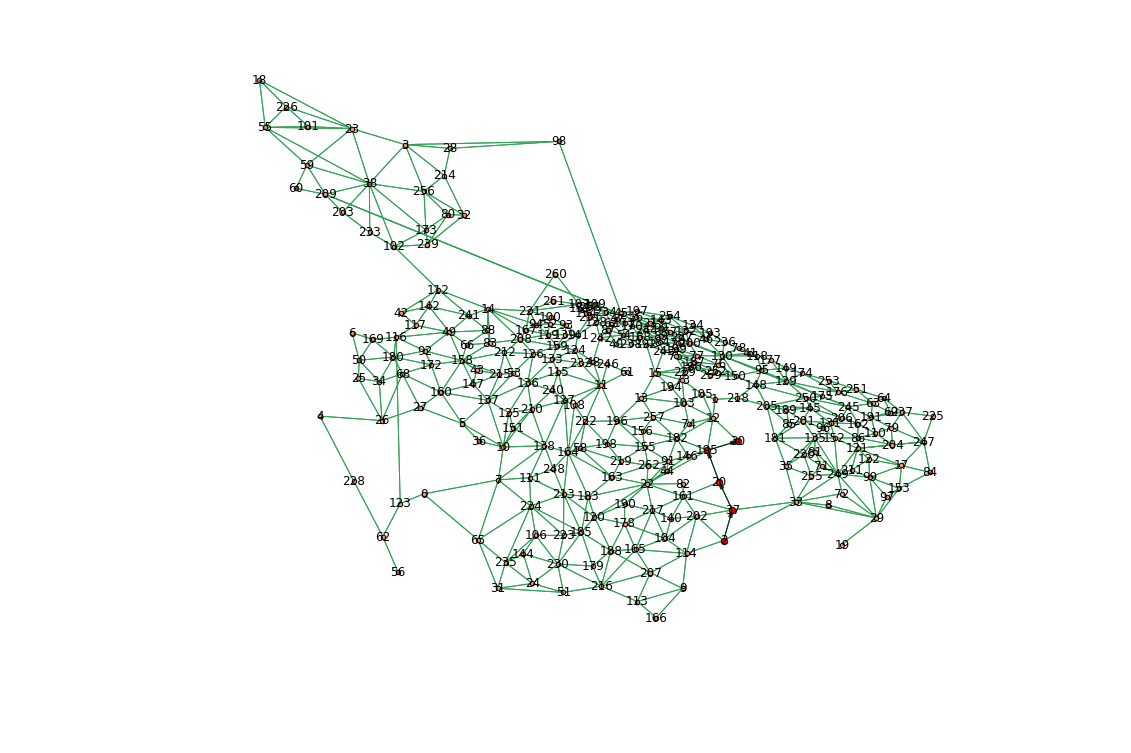

In [539]:
ax1 = plt.figure(figsize=(15,10))
np.random.seed(1335) 
nx.draw(G,pos,node_color='#fc9272',with_labels=True,arrows=False,node_size=20,width=1,edge_color='#31a354')
path = nx.shortest_path(G,source=2,target=30,weight='w')
path_edges = zip(path,path[1:])
nx.draw_networkx_nodes(G,pos,nodelist=path,node_size=40,node_color='r',alpha=0.9)
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='k',width=1,alpha=0.8)

In [540]:
tp_data = pd.read_csv('m1.txt')

In [465]:
tp_data['dz'].max()

262

In [541]:
tp_data1 = tp_data[tp_data['count']>52]

In [542]:
len(tp_data1)

109380

In [543]:
tp_data1.head()

,d,h,dz,pz,count
102,0,17,78,227,55
113,0,21,93,234,61
133,1,22,187,200,63
172,4,10,184,90,56
275,4,6,195,259,65


In [544]:
tp_data2 = tp_data1[tp_data1['dz']!=tp_data1['pz']]

In [545]:
tp_data2.head()

,d,h,dz,pz,count
102,0,17,78,227,55
113,0,21,93,234,61
133,1,22,187,200,63
172,4,10,184,90,56
275,4,6,195,259,65


In [546]:
tp_data2['pz'].max()

259

In [547]:
len(tp_data2)

91160

In [548]:
tp_data2.index

Int64Index([    102,     113,     133,     172,     275,     319,     337,
                371,     413,     422,
            ...
            8764731, 8764869, 8764972, 8765037, 8765068, 8765186, 8765226,
            8765252, 8765577, 8765604],
           dtype='int64', length=91160)

In [549]:
tp_data3 = tp_data2.reset_index()

In [550]:
tp_data3['dz'][46]

199

In [293]:
G.edges()

[(0, 65),
 (0, 123),
 (0, 7),
 (1, 105),
 (1, 218),
 (1, 12),
 (2, 33),
 (2, 202),
 (2, 114),
 (2, 37),
 (3, 256),
 (3, 98),
 (3, 38),
 (3, 214),
 (3, 23),
 (3, 28),
 (4, 26),
 (4, 228),
 (5, 160),
 (5, 137),
 (5, 10),
 (5, 27),
 (5, 36),
 (6, 169),
 (6, 50),
 (7, 224),
 (7, 65),
 (7, 0),
 (7, 10),
 (7, 111),
 (7, 138),
 (8, 33),
 (8, 29),
 (9, 113),
 (9, 114),
 (9, 166),
 (9, 207),
 (10, 36),
 (10, 5),
 (10, 7),
 (10, 137),
 (10, 138),
 (10, 210),
 (10, 151),
 (10, 125),
 (11, 196),
 (11, 232),
 (11, 108),
 (11, 48),
 (11, 115),
 (11, 246),
 (11, 61),
 (11, 222),
 (11, 127),
 (12, 1),
 (12, 195),
 (12, 103),
 (12, 105),
 (12, 74),
 (12, 182),
 (12, 30),
 (13, 257),
 (13, 194),
 (13, 15),
 (13, 196),
 (13, 103),
 (14, 112),
 (14, 167),
 (14, 208),
 (14, 241),
 (14, 83),
 (14, 88),
 (14, 221),
 (14, 94),
 (15, 192),
 (15, 194),
 (15, 229),
 (15, 73),
 (15, 13),
 (15, 243),
 (15, 186),
 (16, 197),
 (16, 170),
 (16, 171),
 (16, 45),
 (16, 143),
 (16, 244),
 (16, 21),
 (17, 99),
 (17, 247)

In [551]:
path_list = []
for i in range(len(tp_data3)):
    path = nx.shortest_path(G,source=tp_data3['dz'][i],target=tp_data3['pz'][i],weight='w')
    path_list.append(path[:len(path)-1])

In [552]:
len(path_list)

91160

In [553]:
tp_data4 = pd.DataFrame({'index':tp_data3['index'],'d':tp_data3['d'],'h':tp_data3['h'],
                        'dz':tp_data3['dz'],'pz':tp_data3['pz'],'count':tp_data3['count'],
                        'path':path_list})

In [224]:
tp_data4.head()

NameError: name 'tp_data4' is not defined

In [555]:
tp_data4.to_csv('dp_path.csv',index=False)

In [556]:
count_list = []
d_list = []
h_list = []
zone_list = []
for i in range(len(tp_data4)):
    for j in range(len(tp_data4['path'][i])):
        zone_list.append(tp_data4['path'][i][j])
        count_list.append(tp_data4['count'][i])
        d_list.append(tp_data4['d'][i])
        h_list.append(tp_data4['h'][i])

In [557]:
len(count_list)

185508

In [184]:
zone_count = pd.DataFrame({'d':d_list,'h':h_list,'zone':zone_list,'count':count_list})

NameError: name 'zone_list' is not defined

In [559]:
zone_count.tail()

,count,d,h,zone
185503,106,2,19,130
185504,93,0,11,236
185505,109,0,14,76
185506,109,0,14,187
185507,73,1,11,89


In [560]:
zone_count['zone'].max()

259

In [561]:
zone_count['h'].value_counts()

10    14452
9     14029
21    13839
20    13794
22    12810
19    11209
7     10719
11    10688
8      8950
12     8552
14     8365
13     8107
1      6581
15     6570
2      6279
18     6251
6      6156
16     4906
3      4071
23     3873
17     2866
5      1809
4       469
0       163
Name: h, dtype: int64

In [562]:
zone_count.to_csv('total_zc.csv',index=False)

In [563]:
len(zone_count)

185508

In [564]:
def mapper(row):
    lines = row.strip().split(',')
    try:
        yield((lines[1],lines[2],lines[3]),int(lines[0]))
    except:
        pass
    
def reducer(k2v2):
    word, counts= k2v2
    return (word, sum(counts))

with open('total_zc.csv') as fi:
    reader = fi.readlines()
    output3 = list(mr.run(reader, mapper, reducer))
    

In [565]:
len(output3)

7964

In [566]:
output3[200:300]

[(('0', '12', '73'), 1845),
 (('0', '12', '75'), 2309),
 (('0', '12', '76'), 7023),
 (('0', '12', '77'), 8414),
 (('0', '12', '78'), 1601),
 (('0', '12', '89'), 1298),
 (('0', '12', '90'), 64),
 (('0', '12', '98'), 316),
 (('0', '13', '103'), 1679),
 (('0', '13', '109'), 60),
 (('0', '13', '11'), 165),
 (('0', '13', '118'), 865),
 (('0', '13', '12'), 1679),
 (('0', '13', '120'), 1426),
 (('0', '13', '127'), 165),
 (('0', '13', '13'), 165),
 (('0', '13', '130'), 3211),
 (('0', '13', '132'), 2037),
 (('0', '13', '134'), 123),
 (('0', '13', '138'), 165),
 (('0', '13', '143'), 1023),
 (('0', '13', '148'), 70),
 (('0', '13', '15'), 165),
 (('0', '13', '150'), 872),
 (('0', '13', '16'), 54),
 (('0', '13', '168'), 1022),
 (('0', '13', '170'), 53),
 (('0', '13', '177'), 865),
 (('0', '13', '183'), 1564),
 (('0', '13', '184'), 4907),
 (('0', '13', '186'), 2877),
 (('0', '13', '187'), 6970),
 (('0', '13', '192'), 54),
 (('0', '13', '195'), 2298),
 (('0', '13', '196'), 165),
 (('0', '13', '197'),

In [572]:
file = open('zone_count.txt','wb')
for item in output3:
     print >> file, int(item[0][0]),int(item[0][1]),int(item[0][2]),item[1]

In [23]:
total_zc = pd.read_csv('zone_count.txt',delim_whitespace=True)

In [24]:
total_zc.head()

,d,h,zone,count
0,0,0,103,53
1,0,0,12,53
2,0,10,1,1223
3,0,10,103,7854
4,0,10,109,551


In [577]:
total_zc.to_csv('final_1.csv',index=False)

In [186]:
total_zc = pd.read_csv('final_1.csv')

In [187]:
total_zc

,d,h,zone,count
0,0,0,103,53
1,0,0,12,53
2,0,10,1,1223
3,0,10,103,7854
4,0,10,109,551
5,0,10,11,350
6,0,10,118,963
7,0,10,12,9077
8,0,10,120,1868
9,0,10,124,118


In [27]:
len(total_zc[total_zc['zone']==103])

146

In [46]:
avg_hr = total_zc['zone'].value_counts()/7

,zone
103,20.857143
12,20.142857
132,19.000000
130,18.857143
186,18.428571
187,18.142857
200,18.142857
22,18.142857
73,17.857143
184,17.714286


In [38]:
a = (total_zc['zone'].value_counts()/7).index
b = (total_zc['zone'].value_counts()/7).values

In [42]:
taxi_zones = gpd.read_file('taxi_zones_1.geojson')
taxi_zones.head()

,cartodb_id,geometry,ntaname
0,2,"(POLYGON ((-73.823376 40.638987, -73.822771 40...",Jamaica Bay
1,8,"(POLYGON ((-73.92334 40.775129, -73.923981 40....",Astoria Park
2,15,"(POLYGON ((-73.777404 40.796598, -73.777389 40...",Bay Terrace/Fort Totten
3,23,"(POLYGON ((-74.19568599999999 40.635017, -74.1...",Bloomfield/Emerson Hill
4,27,"(POLYGON ((-73.86522600000001 40.570458, -73.8...",Breezy Point/Fort Tilden/Riis Beach


In [43]:
taxi_zones.to_csv('taxi_zones_1.csv')

In [71]:
t2 = pd.read_csv('taxi_zones_1.csv', index_col=0)
t2.head()

,cartodb_id,geometry,ntaname
0,2,"MULTIPOLYGON (((-73.823376 40.638987, -73.8227...",Jamaica Bay
1,8,"MULTIPOLYGON (((-73.92334 40.775129, -73.92398...",Astoria Park
2,15,"MULTIPOLYGON (((-73.777404 40.796598, -73.7773...",Bay Terrace/Fort Totten
3,23,"MULTIPOLYGON (((-74.19568599999999 40.635017, ...",Bloomfield/Emerson Hill
4,27,"MULTIPOLYGON (((-73.86522600000001 40.570458, ...",Breezy Point/Fort Tilden/Riis Beach


In [353]:
t2.iloc[70]

cartodb_id                                                  161
geometry      MULTIPOLYGON (((-73.97534400000001 40.7553, -7...
ntaname                                          Midtown Center
Name: 70, dtype: object

In [52]:
df_geo = pd.DataFrame(avg_hr).join(t2)

In [56]:
df_geo.to_csv('report1_avghour.csv',index=False)

In [65]:
t2['zone'][0]

0

In [69]:
total_zc.index = total_zc['zone']

In [75]:
newzc = total_zc.join(t2)

In [122]:
newzc.to_csv('hour_heatmap.csv')

In [170]:
d_list = []
for item in newzc['d']:
    d_list.append('2013-01-0'+str(item+1)+' ')

In [174]:
h_list= [] 
for item in newzc['h']:
    h_list.append(str(item)+':00:00')

In [175]:
newzc['hours'] = h_list
newzc['date'] = d_list

In [179]:
newzc['newdate']  =newzc['date']+newzc['hour']

In [102]:
import datetime

In [177]:
newzc.head()

,d,h,zone,count,cartodb_id,geometry,ntaname,hour,hours,date
1,0,10,1,1223,8,"MULTIPOLYGON (((-73.92334 40.775129, -73.92398...",Astoria Park,10:00:00,10:00:00,2013-01-01
1,0,11,1,411,8,"MULTIPOLYGON (((-73.92334 40.775129, -73.92398...",Astoria Park,11:00:00,11:00:00,2013-01-01
1,0,12,1,63,8,"MULTIPOLYGON (((-73.92334 40.775129, -73.92398...",Astoria Park,12:00:00,12:00:00,2013-01-01
1,0,15,1,405,8,"MULTIPOLYGON (((-73.92334 40.775129, -73.92398...",Astoria Park,15:00:00,15:00:00,2013-01-01
1,0,16,1,58,8,"MULTIPOLYGON (((-73.92334 40.775129, -73.92398...",Astoria Park,16:00:00,16:00:00,2013-01-01


In [180]:
newzc[['newdate','count','geometry']].to_csv('hour_heatmap.csv')

In [85]:
datetime.today()

datetime.datetime(2016, 5, 12, 15, 11, 14, 140466)

In [422]:
total_zc['zone'].max()

259

In [305]:
total_zc.sort(['d','h','zone'], ascending=[1,1,1])

/Users/luke/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,d,h,zone,count
1,0,0,12,53
0,0,0,103,53
840,0,4,11,109
846,0,4,22,62
850,0,4,48,109
841,0,4,182,109
842,0,4,183,62
843,0,4,195,171
844,0,4,196,109
845,0,4,213,62


In [298]:
total_zc.sort(['d','h','zone'], ascending=[1,1,1]).to_csv('time_series.csv',index=False)

/Users/luke/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [277]:
with open('time_series.csv') as fi:
    reader = fi.readlines()

In [278]:
reader[1:10]

['0,16,1,58\n',
 '0,15,1,405\n',
 '0,12,1,63\n',
 '0,11,1,411\n',
 '0,10,1,1223\n',
 '0,9,1,174\n',
 '0,7,1,643\n',
 '0,6,1,799\n',
 '0,5,1,565\n']

In [387]:
taxi_zones.iloc[70]

cartodb_id                                                  161
geometry      (POLYGON ((-73.97534400000001 40.7553, -73.975...
ntaname                                          Midtown Center
Name: 70, dtype: object

In [257]:
len(total_zc['zone'].value_counts())

120

In [424]:
day_list = []
for i in range(7):
    day_list+= [i]*259*24

In [425]:
hour_list= []
for i in range(7):
    for j in range(24):
        hour_list += [j]*259

In [426]:
temp_list = map(lambda x:x+1,range(259))
zone_list = []
for i in range(24*7):
    zone_list += temp_list


In [427]:
new_zc = pd.DataFrame({'d':day_list,'h':hour_list,'zone':zone_list})

In [428]:
ts_zc = pd.merge(new_zc,total_zc,left_on=['d','h','zone'],right_on=['d','h','zone'],how='outer')
     

In [430]:
len(ts_zc)

43512

In [423]:
259*7*24

43512

In [431]:
count_list = []
for i in range(43512):
    if ts_zc['count'][i]!=ts_zc['count'][i]:
        count_list.append(0)
    else:
        count_list.append(ts_zc['count'][i])

In [432]:
new_zc = pd.DataFrame({'d':day_list,'h':hour_list,'zone':zone_list,'counts':map(lambda x: x/52.0,count_list)})

In [433]:
new_zc.head()

,counts,d,h,zone
0,0,0,0,1
1,0,0,0,2
2,0,0,0,3
3,0,0,0,4
4,0,0,0,5


In [434]:
len(new_zc)/120

362

In [435]:
new_zc.to_csv('ts_zc.csv',index=False)

In [436]:
total_zc[(total_zc['d']==1)&(total_zc['h']==7)&(total_zc['zone']==70)]

,d,h,zone,count
2037,1,7,70,46253


In [437]:
import numpy as np

In [439]:
zc_matrix = new_zc['counts'].as_matrix().reshape(168,259)

In [440]:
zc_df = pd.DataFrame(zc_matrix.transpose())

In [441]:
zc_df.index = temp_list

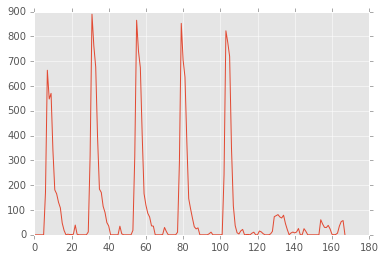

In [446]:
plt.plot(zc_df.iloc[69])

In [480]:
dataset = zc_df
dataset1 = []
for i in range(len(dataset)):
    dataset1.append((dataset.iloc[i]-np.mean(dataset.iloc[i]))/np.std(dataset.iloc[i]))

In [481]:
dataset2 = pd.DataFrame(dataset1)
dataset2 = dataset2[dataset2[0].notnull()]

0      -0.077382
1      -0.077382
2      -0.077382
3      -0.077382
4      -0.077382
5       2.842638
6       3.591632
7       3.095029
8       2.076513
9       4.929399
10      4.259545
11      2.272543
12      1.832051
13      1.792789
14      6.150944
15      2.226328
16      1.838621
17      1.127614
18      2.798805
19      4.844932
20      9.921712
21      3.400804
22      2.354389
23     -0.077382
24     -0.077382
25     -0.077382
26     -0.077382
27     -0.077382
28     -0.077382
29      0.234591
         ...    
138     0.528360
139     2.747050
140     7.079150
141     5.102738
142     2.341784
143     0.713468
144    -0.077382
145     5.647789
146    11.767325
147     4.353900
148    -0.077382
149    -0.077382
150    -0.077382
151    -0.077382
152    -0.077382
153    -0.077382
154     3.639514
155     4.707744
156     2.380150
157     1.510090
158     2.111533
159     2.839298
160     2.207292
161     3.128033
162     1.339125
163     1.648168
164     2.925141
165     4.0875

In [466]:
from sklearn.cluster import KMeans
est=KMeans(n_clusters=3,n_init=100)
est.fit(dataset2)
labels=est.labels_

2 clusters: 0.219151746268
3 clusters: 0.235679010422
4 clusters: 0.252854230664
5 clusters: 0.268203642317
6 clusters: 0.276733279573
7 clusters: 0.270077056972
8 clusters: 0.290538794578
9 clusters: 0.285520183936
10 clusters: 0.24055628121
11 clusters: 0.241040354603
Best for 8 clusters: 0.273510730777


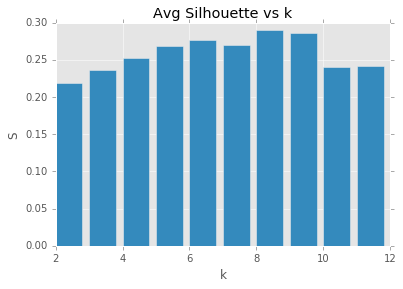

In [468]:
from sklearn.metrics import silhouette_score
s=[0]*10
for k in range(0,10):
    est=KMeans(n_clusters=k+2,n_init=150)
    est.fit(dataset2)
    s[k]=silhouette_score(dataset2, est.labels_)
    print('{0} clusters: {1}'.format(k+2,s[k]))
k=np.argmax(s)    
est=KMeans(n_clusters=k+2,n_init=100)
est.fit(dataset2)
labels=est.labels_
plt.figure()
plt.bar(range(2,12),s)
plt.xlabel('k')
plt.ylabel('S')
plt.title('Avg Silhouette vs k')
print('Best for {0} clusters: {1}'.format(k+2,silhouette_score(dataset2, labels)))

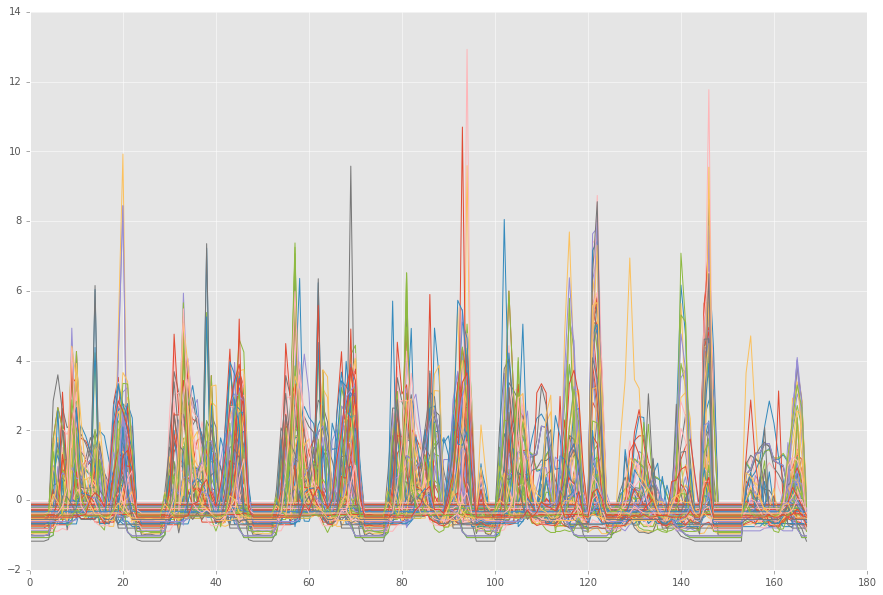

In [482]:
f = plt.figure(figsize=(15,10))
ax1 = plt.subplot(1,1,1) 
ax1.spines["top"].set_visible(False)  ## set the top frame invisible
ax1.spines["right"].set_visible(False) ## set the right frame invisible
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  
for i in range(len(dataset2)):
    try:
        plt.plot(dataset2.iloc[i])
    except:
        pass

In [491]:
def cluster(n,dataset2):
    est=KMeans(n_clusters=n,n_init=100)
    est.fit(dataset2)
    labels=est.labels_
    df_label = pd.DataFrame({'label':labels})
    df_label.index = dataset2.index
    dataset3 = dataset2.join(df_label)
    return dataset3

In [484]:
def cluster_plot(n,dataset3):
    for i in range(n):
        data_byl = dataset3[dataset3['label'] == i]
        m = len(data_byl)
        sum_zip = 0
        for i in range(m):
            sum_zip = sum_zip + data_byl.iloc[i]
        avg_zip = sum_zip[0:len(sum_zip)-1] /m
        f = plt.figure(figsize=(10,6))
        ax1 = plt.subplot(1,1,1) 
        ax1.spines["top"].set_visible(False)  ## set the top frame invisible
        ax1.spines["right"].set_visible(False) ## set the right frame invisible
        ax1.get_xaxis().tick_bottom()  
        ax1.get_yaxis().tick_left()
        for i in range(len(dataset)):
            plt.plot(dataset2.iloc[i],'grey',alpha=0.4)
        plt.plot(range(1994,2014),avg_zip,'#31a354',linewidth=15,alpha=0.8)

In [492]:
def cluster_p(n):
    cluster_n = cluster(n,dataset2)
    cluster_plot(n,cluster_n)

In [501]:
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [504]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):

        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])

        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2

    return sqrt(LB_sum)

In [522]:
from sklearn.cluster import KMeans
est=KMeans(n_clusters=8,n_init=100)
est.fit(dataset2)
labels=est.labels_

In [523]:
labels

array([3, 5, 7, 1, 3, 7, 1, 1, 4, 6, 5, 4, 2, 0, 2, 6, 1, 1, 7, 4, 0, 7, 5,
       0, 0, 3, 0, 2, 6, 2, 4, 6, 6, 1, 1, 1, 5, 1, 3, 7, 0, 1, 0, 1, 1, 2,
       1, 5, 1, 1, 1, 1, 1, 2, 2, 1, 6, 1, 7, 5, 1, 1, 6, 5, 3, 2, 0, 7, 0,
       1, 1, 7, 7, 1, 4, 4, 1, 1, 6, 7, 5, 0, 2, 2, 1, 2, 1, 3, 7, 4, 0, 0,
       1, 1, 5, 1, 3, 7, 7, 3, 5, 0, 3, 0, 1, 0, 2, 4, 1, 1, 0, 6, 7, 7, 2,
       1, 6, 7, 0, 2], dtype=int32)

In [524]:
dataset2.index

Int64Index([  1,   7,  10,  11,  12,  13,  14,  15,  16,  21,
            ...
            243, 244, 246, 251, 252, 253, 254, 257, 258, 259],
           dtype='int64', length=120)

In [525]:
label = pd.DataFrame({'labels':labels})
label.index = dataset2.index

In [526]:
cluster_geo = label.join(t2)

In [527]:
cluster_geo[['labels','geometry']].to_csv('geo_cluster.csv',index=False)